## **Breast Cancer Dataset Overview**
     Goal: Predict whether a tumor is malignant (1) or benign (0) based on features like radius, texture, perimeter, etc.

    Dataset: Breast Cancer Dataset on Kaggle.

    Features: 30 numeric features (e.g., radius_mean, texture_mean, perimeter_mean).

    Target: diagnosis (M = malignant, B = benign).

 ## Load and Explore the Dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

# Explore
df.head(1)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [5]:
print(df.info())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
print(df['diagnosis'].value_counts())  # Class distribution

diagnosis
B    357
M    212
Name: count, dtype: int64


## Data Preprocessing

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

 ## Drop irrelevant columns:

In [10]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)  # 'id' is not useful, 'Unnamed: 32' is empty

## Split data into features (X) and target (y):

In [11]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

## Train-test split:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering
    Feature scaling: K-NN is distance-based, so scale features:

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature selection: Remove highly correlated features to reduce dimensionality:

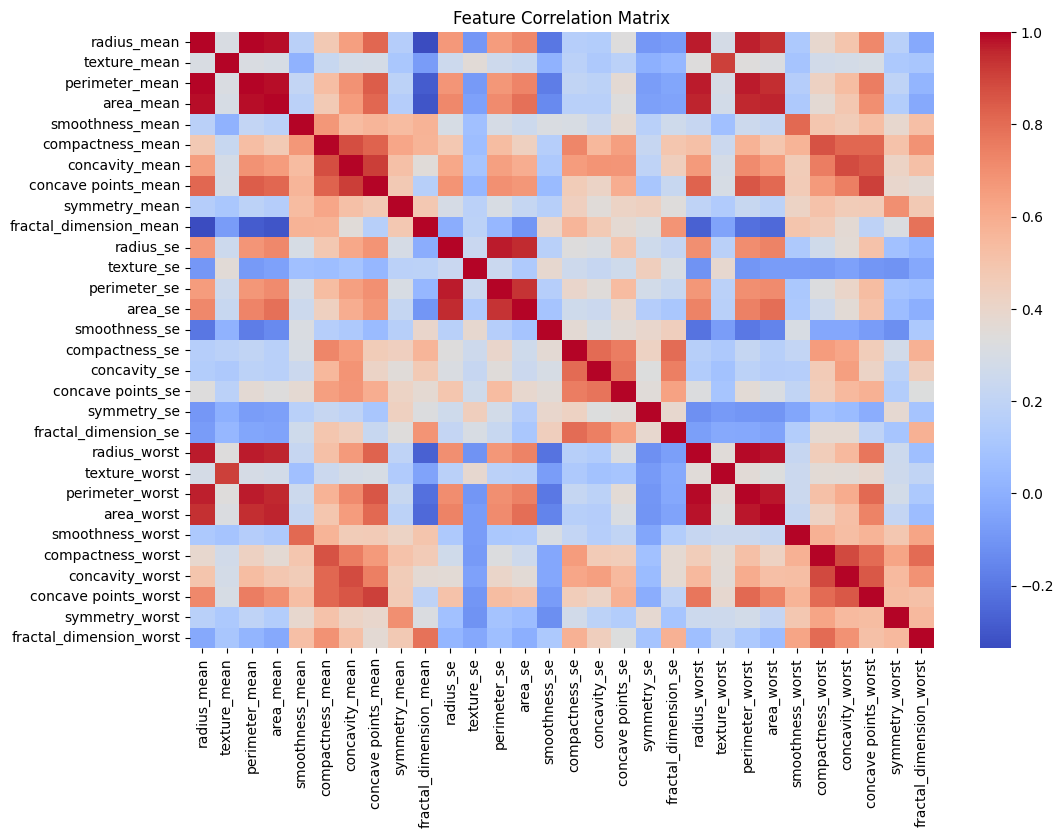

In [14]:
# Calculate correlation matrix
corr_matrix = X_train.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Drop highly correlated features (e.g., keep one of radius_mean, perimeter_mean, area_mean)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns).drop(['perimeter_mean', 'area_mean'], axis=1)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns).drop(['perimeter_mean', 'area_mean'], axis=1)

 ## Model Training

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[68  3]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
best_knn = grid.best_estimator_

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


 ### Evaluate the Tuned Model

In [17]:
y_pred_tuned = best_knn.predict(X_test_scaled)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

Tuned Accuracy: 0.9649122807017544
Confusion Matrix:
 [[69  2]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### Feature Importance (Permutation Importance)

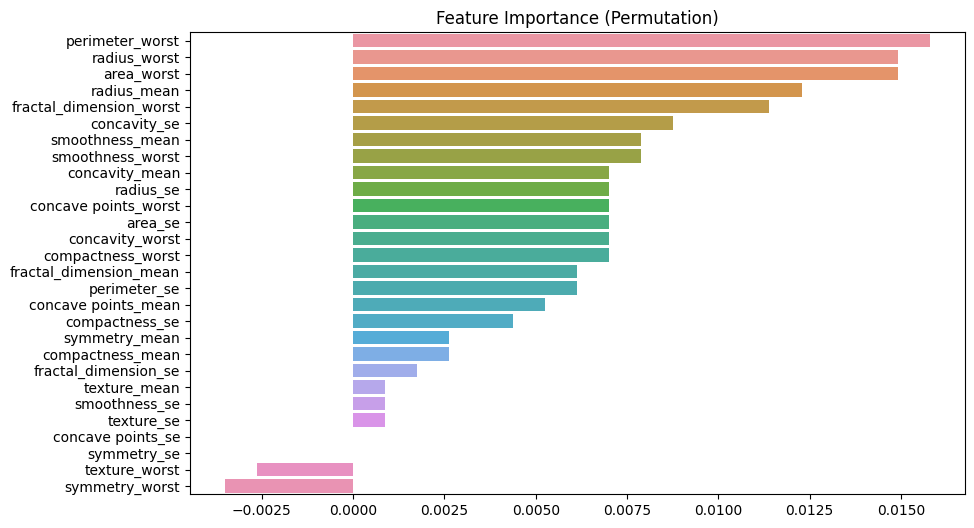

In [18]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
feature_importance = pd.Series(result.importances_mean, index=X_train_scaled.columns)
feature_importance.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Permutation)')
plt.show()